Problem Statement

Column Description
The dataset contains various attributes related to employees, including:

Age
Attrition (Yes/No)
BusinessTravel
Department
DistanceFromHome
Education
EducationField
EnvironmentSatisfaction
Gender
JobLevel
JobRole
MaritalStatus
MonthlyIncome
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole

In [99]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import math
from sklearn import metrics 



In [100]:
df=pd.read_csv("C:\\Users\\wanja\\OneDrive\\Desktop\\Jupyter\\Employee ATT.csv")
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,jobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,2,...,Yes,11,3,1,0,8,0,1,6,4
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,1,10,3,3,10,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,1,...,Yes,15,3,2,0,7,3,3,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,1,...,Yes,11,3,3,0,8,3,3,8,7
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,1,...,No,12,3,4,1,6,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,2,...,No,17,3,3,1,17,3,3,5,2
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,3,...,No,15,3,1,1,9,5,3,7,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,2,...,Yes,20,4,2,1,6,0,3,6,2
1468,49,No,Travel_Frequently,Sales,2,3,Medical,4,Male,2,...,No,14,3,4,0,17,3,2,9,6


In [101]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,jobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,2,...,Yes,11,3,1,0,8,0,1,6,4
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,1,10,3,3,10,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,1,...,Yes,15,3,2,0,7,3,3,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,1,...,Yes,11,3,3,0,8,3,3,8,7
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,1,...,No,12,3,4,1,6,3,3,2,2


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   jobLevel                  1470 non-null   int64 
 10  JobRole                   1470 non-null   object
 11  JobSatisfaction           1470 non-null   int64 
 12  MaritalStatus             1470 non-null   object
 13  MonthlyIncome             1470 non-null   int64 
 14  NumCompaniesWorked      

In [103]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,jobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252
std,9.135373,8.106864,1.024165,1.093082,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000


In [104]:
df.shape

(1470, 25)

In [105]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
jobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
dtype: int64

Employees that stayed and left the company

In [106]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

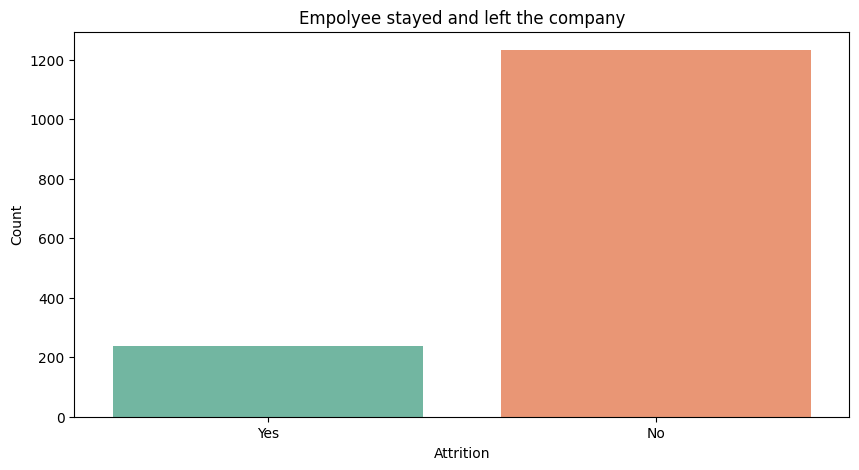

In [107]:
plt.figure(figsize=(10, 5))

sns.countplot(x='Attrition', hue='Attrition', data=df, palette='Set2')
plt.title('Empolyee stayed and left the company')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

# # Observation 

From the countplot , we can check out of 1470 employees 237 of the employees left their job due some reason whereas other 1233 of the employees preferred to continue thier job at the company.

# Drop Column

In [108]:
df.drop(columns = ['StockOptionLevel'],inplace =True)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,jobLevel,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,2,...,8,Yes,11,3,1,8,0,1,6,4
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,1,No,23,4,4,10,3,3,10,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,1,...,6,Yes,15,3,2,7,3,3,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,1,...,1,Yes,11,3,3,8,3,3,8,7
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,1,...,9,No,12,3,4,6,3,3,2,2


In [109]:
# print all of the data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('_________________________________________________________')

Attrition:['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
_________________________________________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
_________________________________________________________
Department:['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
_________________________________________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
_________________________________________________________
Gender:['Female' 'Male'

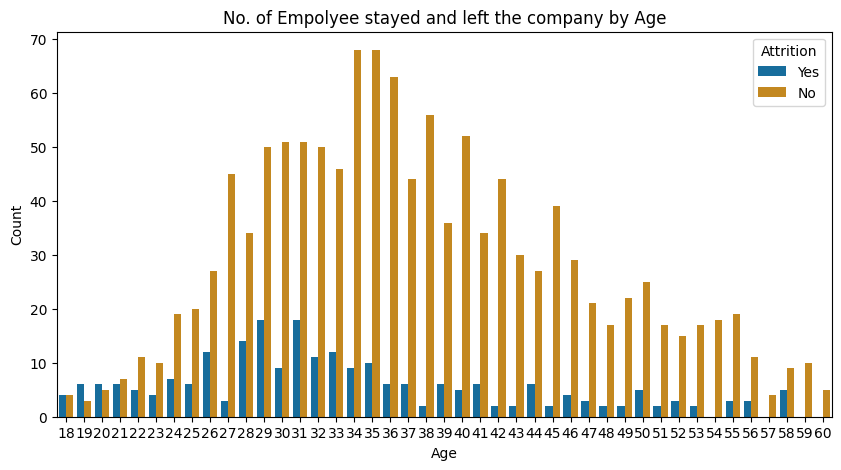

In [110]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Age', hue='Attrition', data=df, palette='colorblind')
plt.title('No. of Empolyee stayed and left the company by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

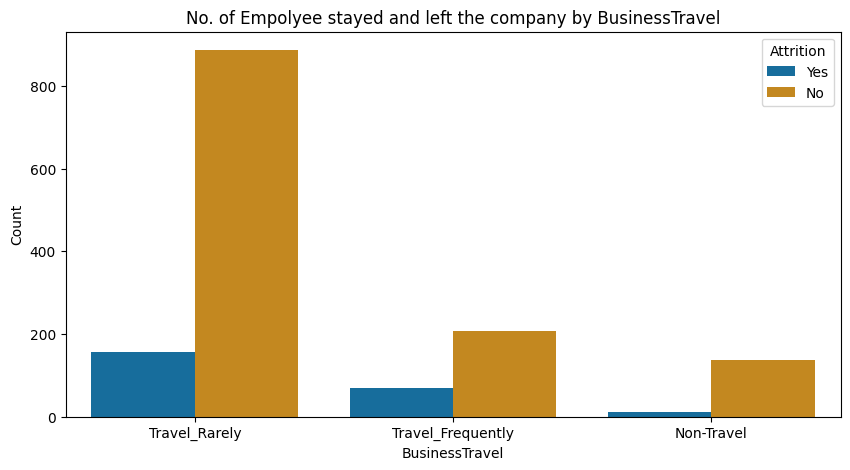

In [111]:
plt.figure(figsize=(10, 5))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette='colorblind')
plt.title('No. of Empolyee stayed and left the company by BusinessTravel')
plt.xlabel('BusinessTravel')
plt.ylabel('Count')
plt.show()

From the above countplot that clear that employees who travel rarely have more attrition rate followed by employess who travel frequently 

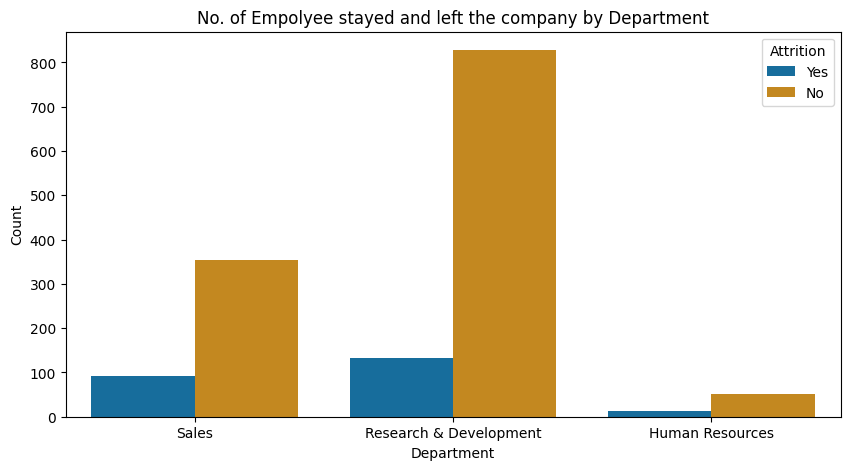

In [112]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Department', hue='Attrition', data=df, palette='colorblind')
plt.title('No. of Empolyee stayed and left the company by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

From the above countplot that clear that employees who belong to resarch & Development have more attrition rate and employees who belong to Human Resources have less attrition rate.

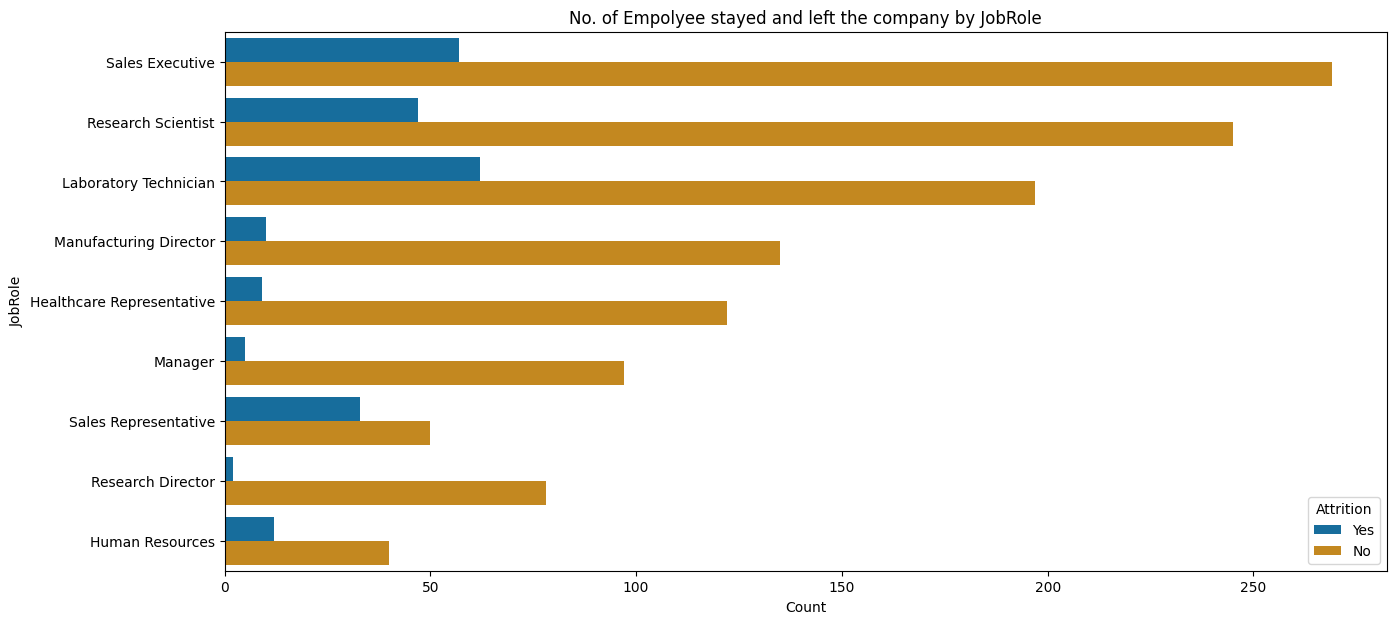

In [113]:
plt.figure(figsize=(15, 7))
sns.countplot(y='JobRole', hue='Attrition', data=df, palette='colorblind')
plt.title('No. of Empolyee stayed and left the company by JobRole')
plt.xlabel('Count')
plt.ylabel('JobRole')
plt.show()

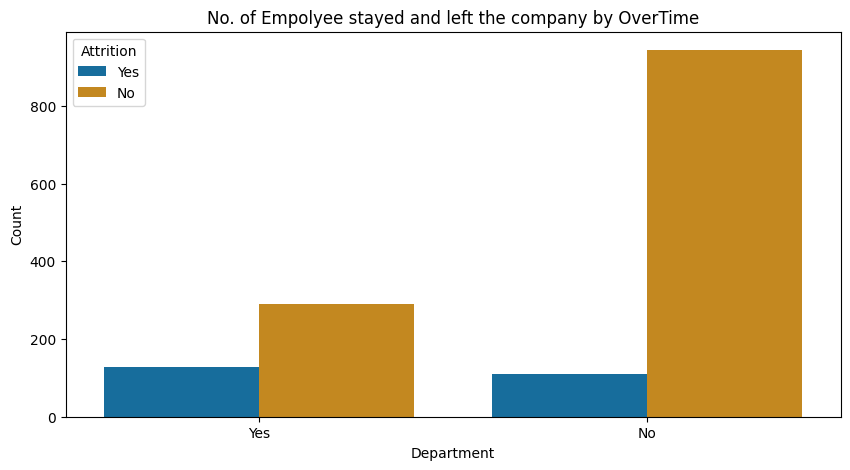

In [114]:
plt.figure(figsize=(10, 5))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='colorblind')
plt.title('No. of Empolyee stayed and left the company by OverTime')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

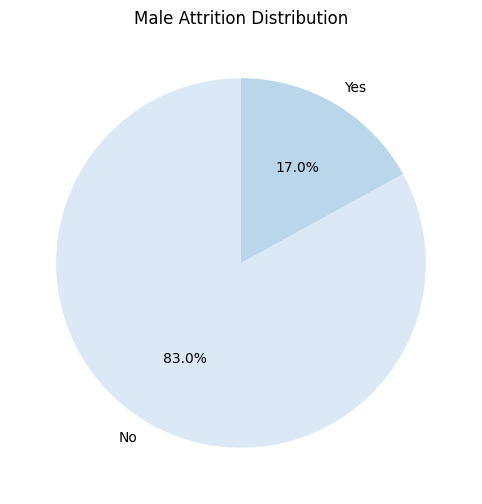

In [115]:
contingency_table = pd.crosstab(df['Gender'], df['Attrition'])
selected_category = 'Male'  
selected_data = contingency_table.loc[selected_category]
plt.figure(figsize=(8, 6))
plt.pie(selected_data, labels=selected_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))
plt.title(f"{selected_category} Attrition Distribution")
plt.show()

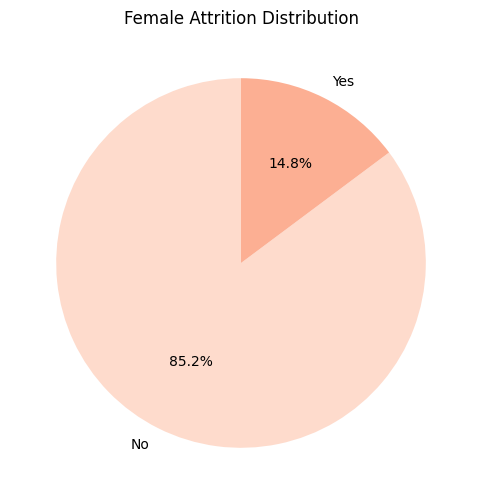

In [116]:
contingency_table = pd.crosstab(df['Gender'], df['Attrition'])
selected_category = 'Female'  
selected_data = contingency_table.loc[selected_category]
plt.figure(figsize=(8, 6))
plt.pie(selected_data, labels=selected_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds'))
plt.title(f"{selected_category} Attrition Distribution")
plt.show()

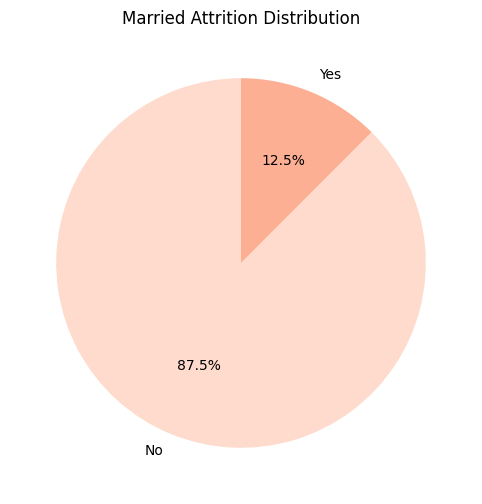

In [117]:
contingency_table = pd.crosstab(df['MaritalStatus'], df['Attrition'])
selected_category = 'Married'  
selected_data = contingency_table.loc[selected_category]
plt.figure(figsize=(8, 6))
plt.pie(selected_data, labels=selected_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds'))
plt.title(f"{selected_category} Attrition Distribution")
plt.show()

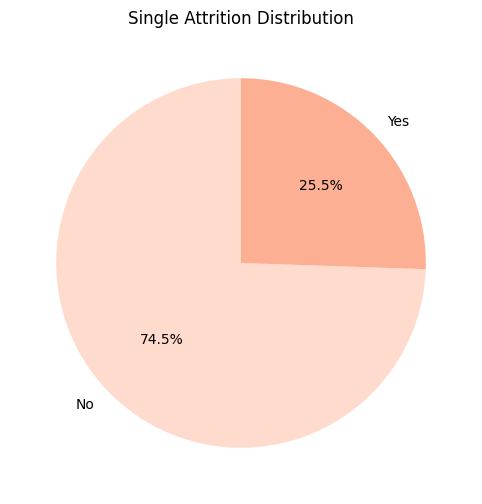

In [118]:
contingency_table = pd.crosstab(df['MaritalStatus'], df['Attrition'])
selected_category = 'Single'  
selected_data = contingency_table.loc[selected_category]
plt.figure(figsize=(8, 6))
plt.pie(selected_data, labels=selected_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds'))
plt.title(f"{selected_category} Attrition Distribution")
plt.show()

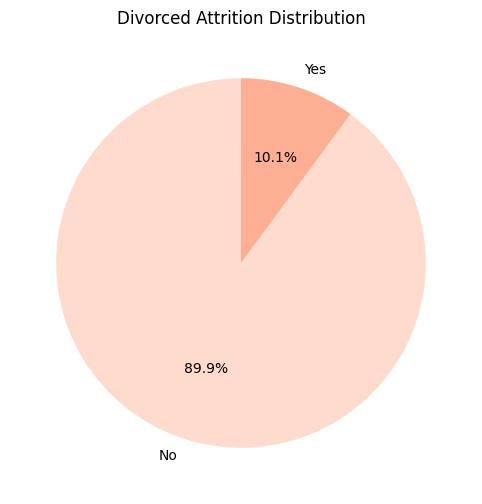

In [119]:
contingency_table = pd.crosstab(df['MaritalStatus'], df['Attrition'])
selected_category = 'Divorced'  
selected_data = contingency_table.loc[selected_category]
plt.figure(figsize=(8, 6))
plt.pie(selected_data, labels=selected_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds'))
plt.title(f"{selected_category} Attrition Distribution")
plt.show()

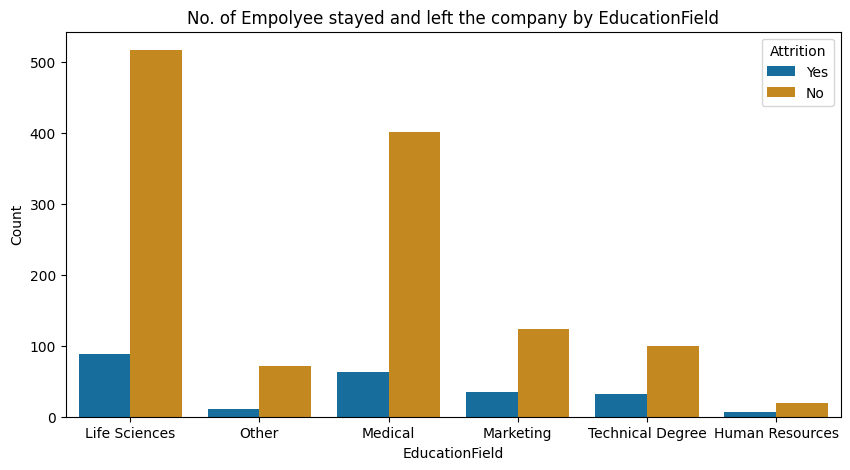

In [120]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EducationField', hue='Attrition', data=df, palette='colorblind')
plt.title('No. of Empolyee stayed and left the company by EducationField')
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.show()

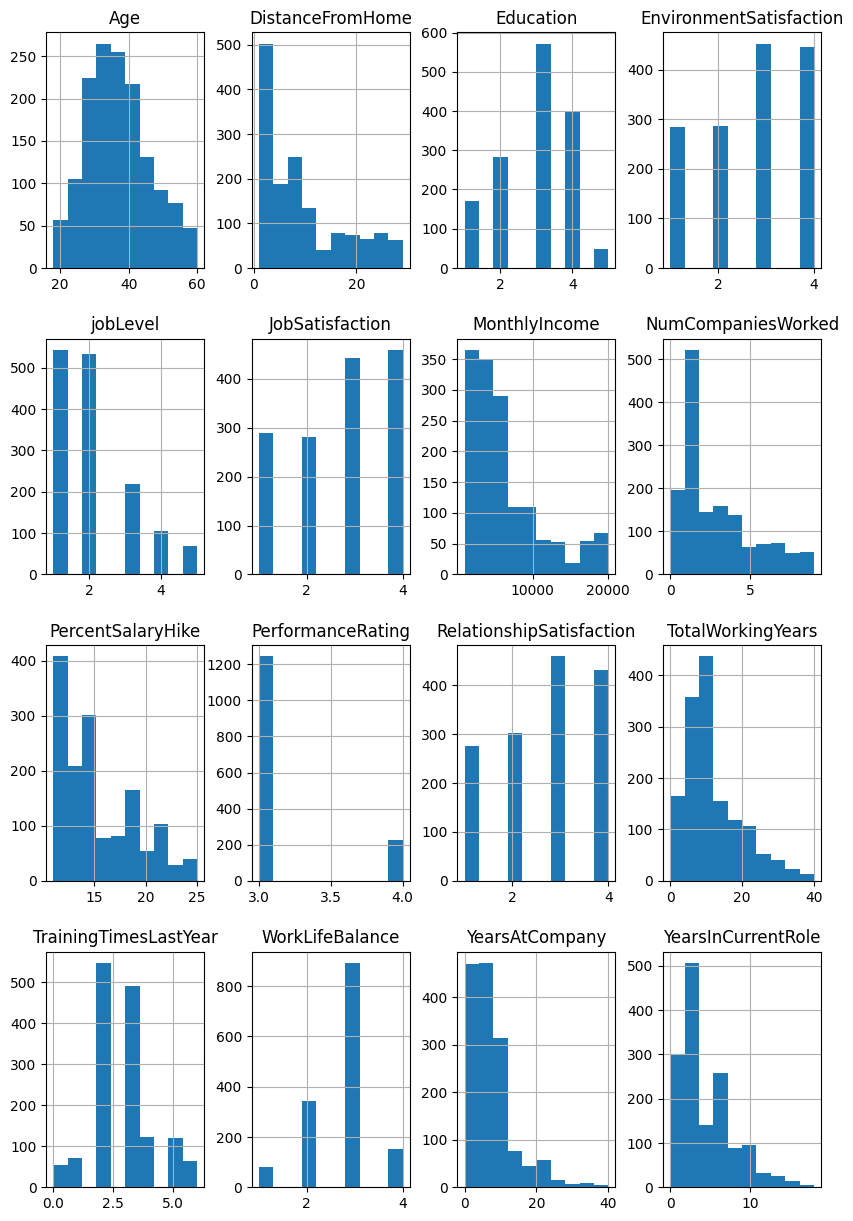

In [121]:
df.hist(figsize=(10,15));

# Finding outliers

<Axes: xlabel='MonthlyIncome'>

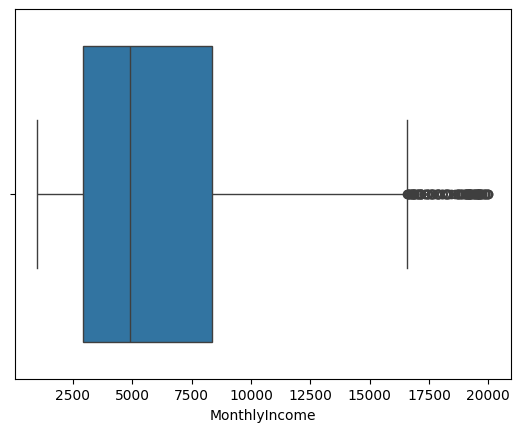

In [122]:
sns.boxplot(x="MonthlyIncome", data=df)

Are MonthlyIncome outliers present

# Removing outliers

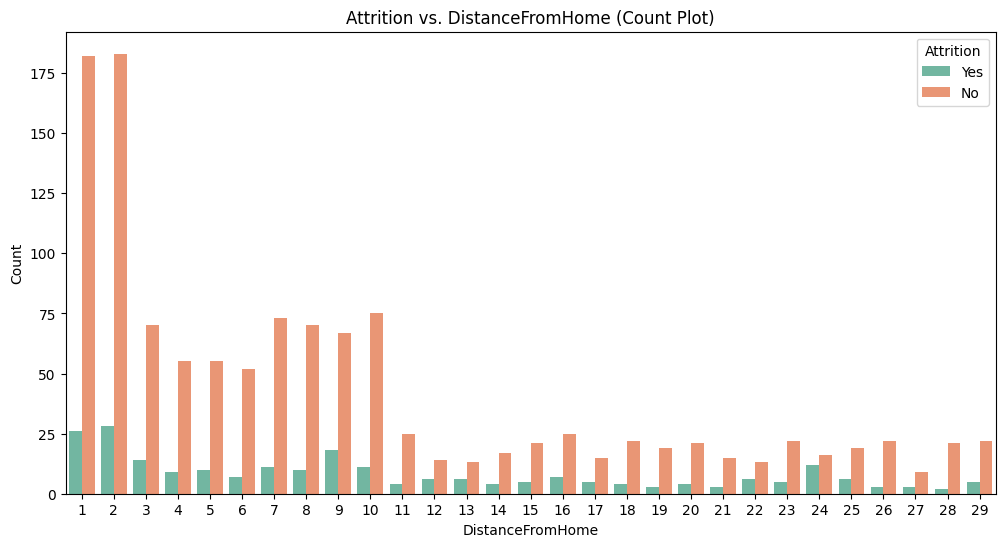

In [123]:
plt.figure(figsize=(12, 6))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition vs. DistanceFromHome (Count Plot)')
plt.xlabel('DistanceFromHome')
plt.ylabel('Count')
plt.show()

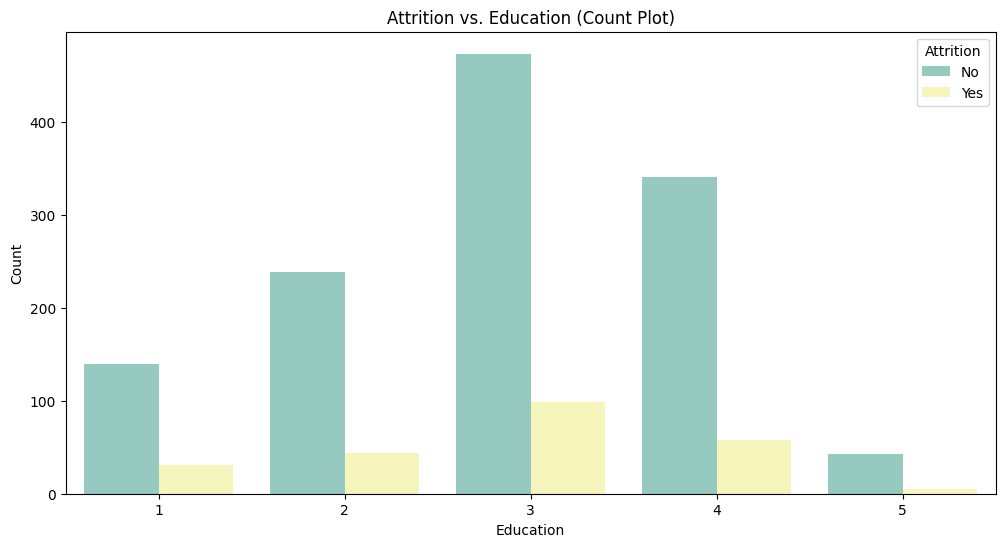

In [124]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Education', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition vs. Education (Count Plot)')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

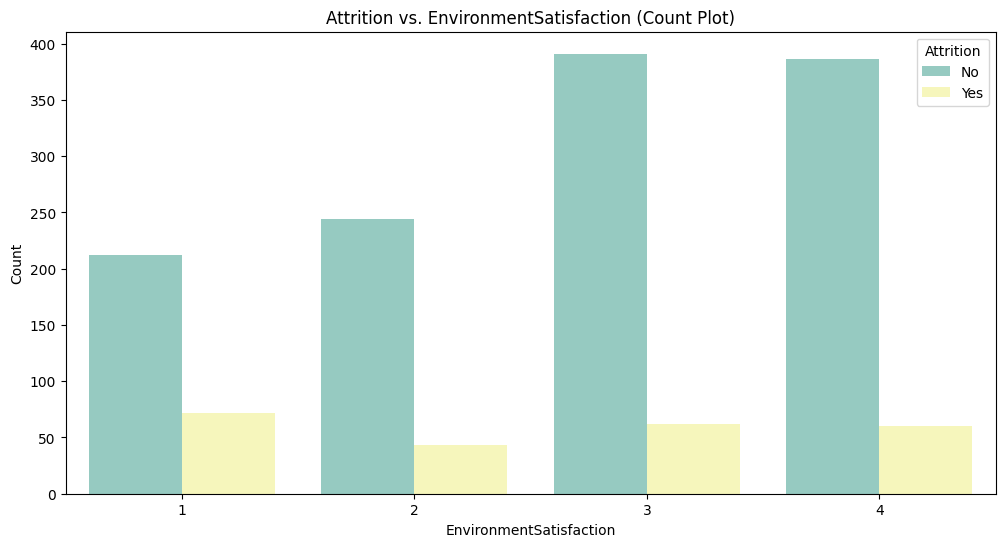

In [125]:
plt.figure(figsize=(12, 6))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition vs. EnvironmentSatisfaction (Count Plot)')
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('Count')
plt.show()

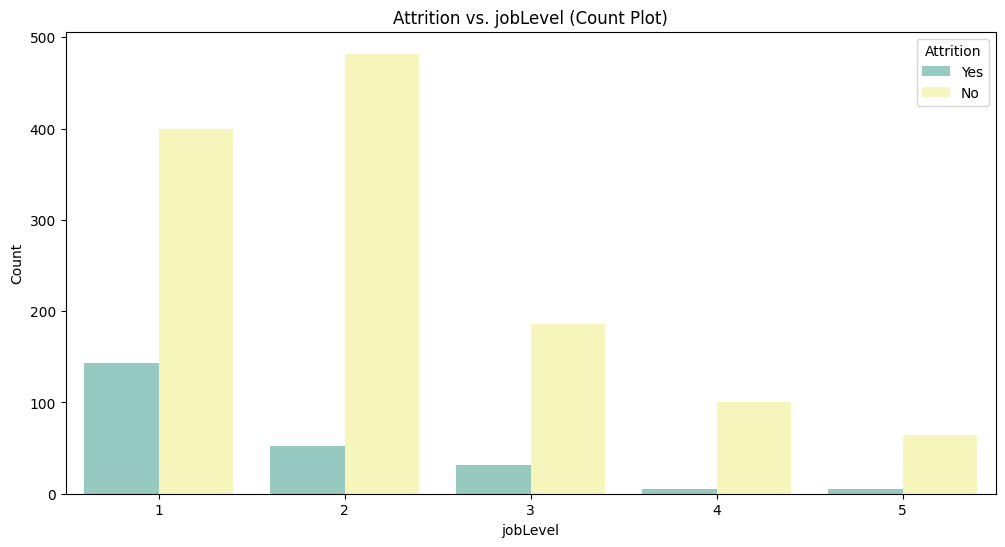

In [126]:
plt.figure(figsize=(12, 6))
sns.countplot(x='jobLevel', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition vs. jobLevel (Count Plot)')
plt.xlabel('jobLevel')
plt.ylabel('Count')
plt.show()

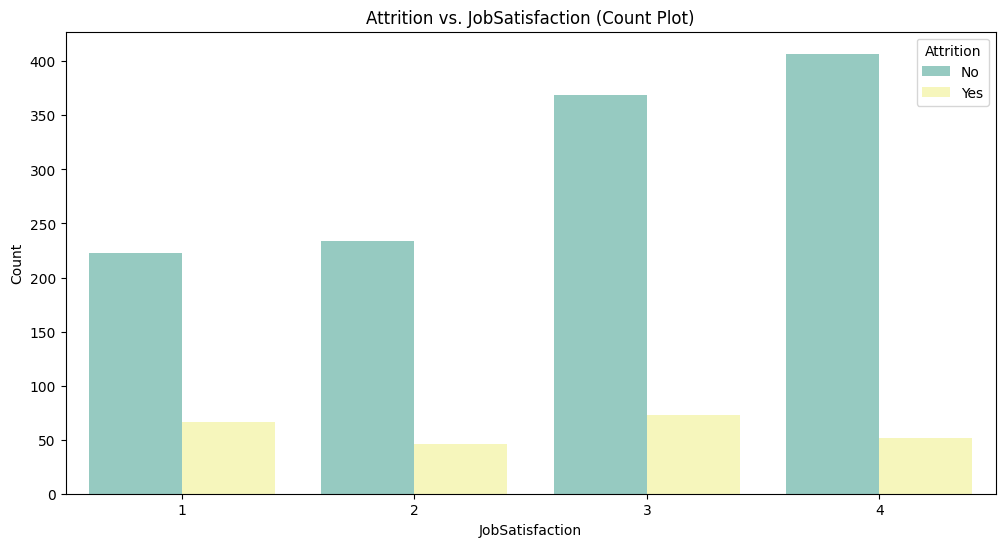

In [127]:
plt.figure(figsize=(12, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition vs. JobSatisfaction (Count Plot)')
plt.xlabel('JobSatisfaction')
plt.ylabel('Count')
plt.show()

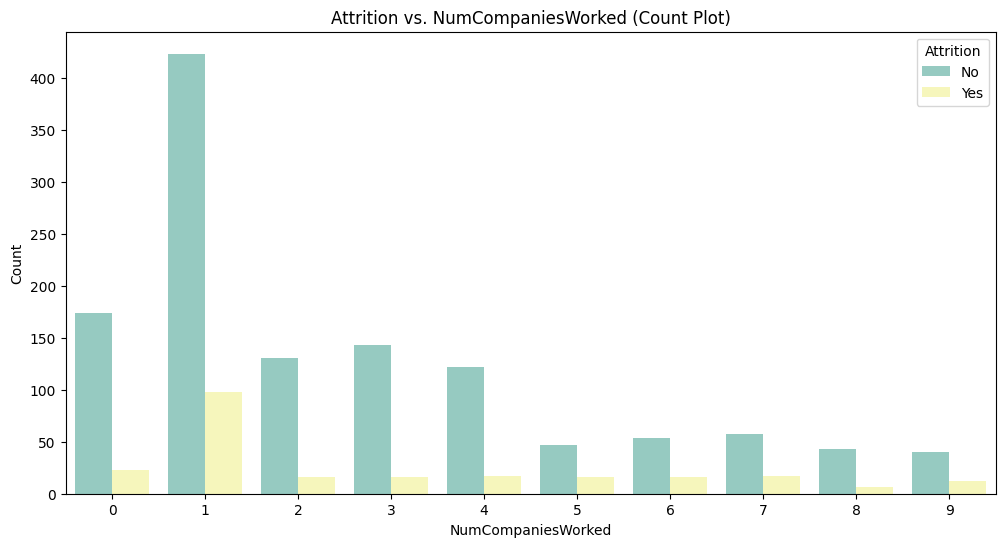

In [128]:
plt.figure(figsize=(12, 6))
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition vs. NumCompaniesWorked (Count Plot)')
plt.xlabel('NumCompaniesWorked')
plt.ylabel('Count')
plt.show()

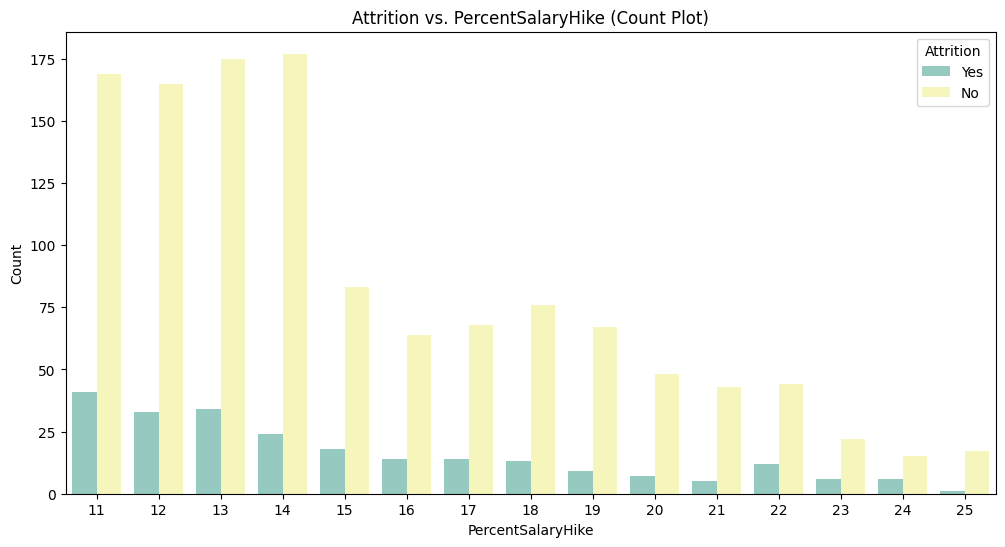

In [129]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition vs. PercentSalaryHike (Count Plot)')
plt.xlabel('PercentSalaryHike')
plt.ylabel('Count')
plt.show()

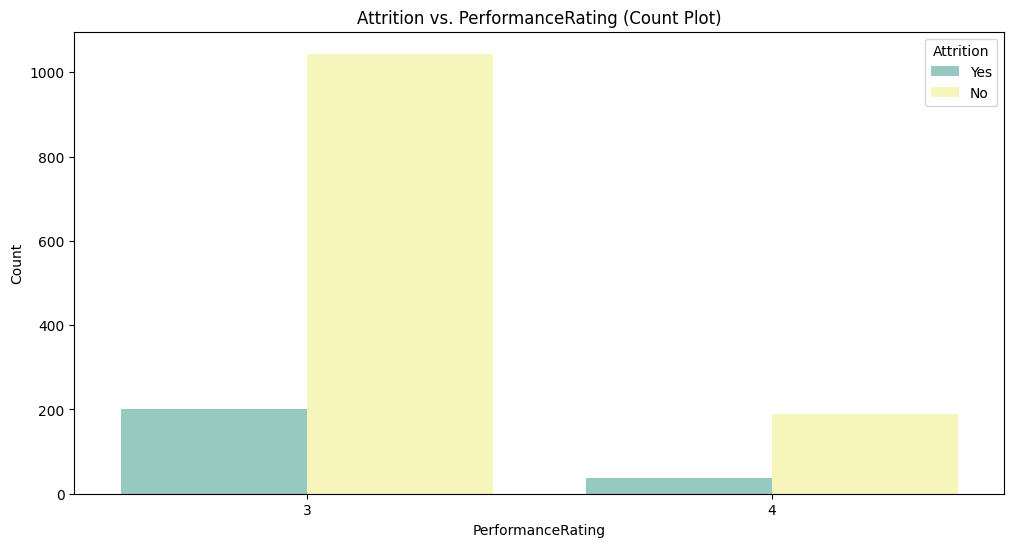

In [130]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PerformanceRating', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition vs. PerformanceRating (Count Plot)')
plt.xlabel('PerformanceRating')
plt.ylabel('Count')
plt.show()

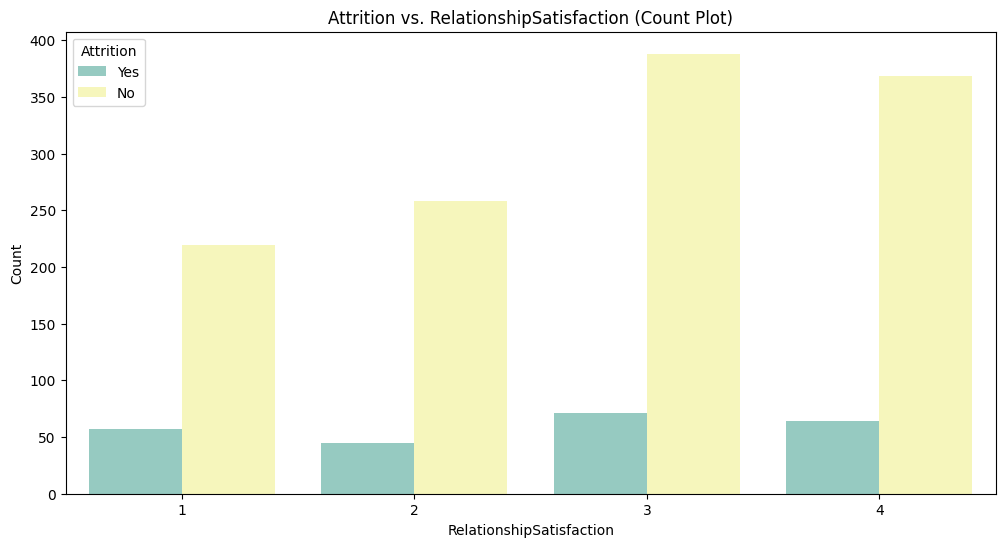

In [131]:
plt.figure(figsize=(12, 6))
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition vs. RelationshipSatisfaction (Count Plot)')
plt.xlabel('RelationshipSatisfaction')
plt.ylabel('Count')
plt.show()

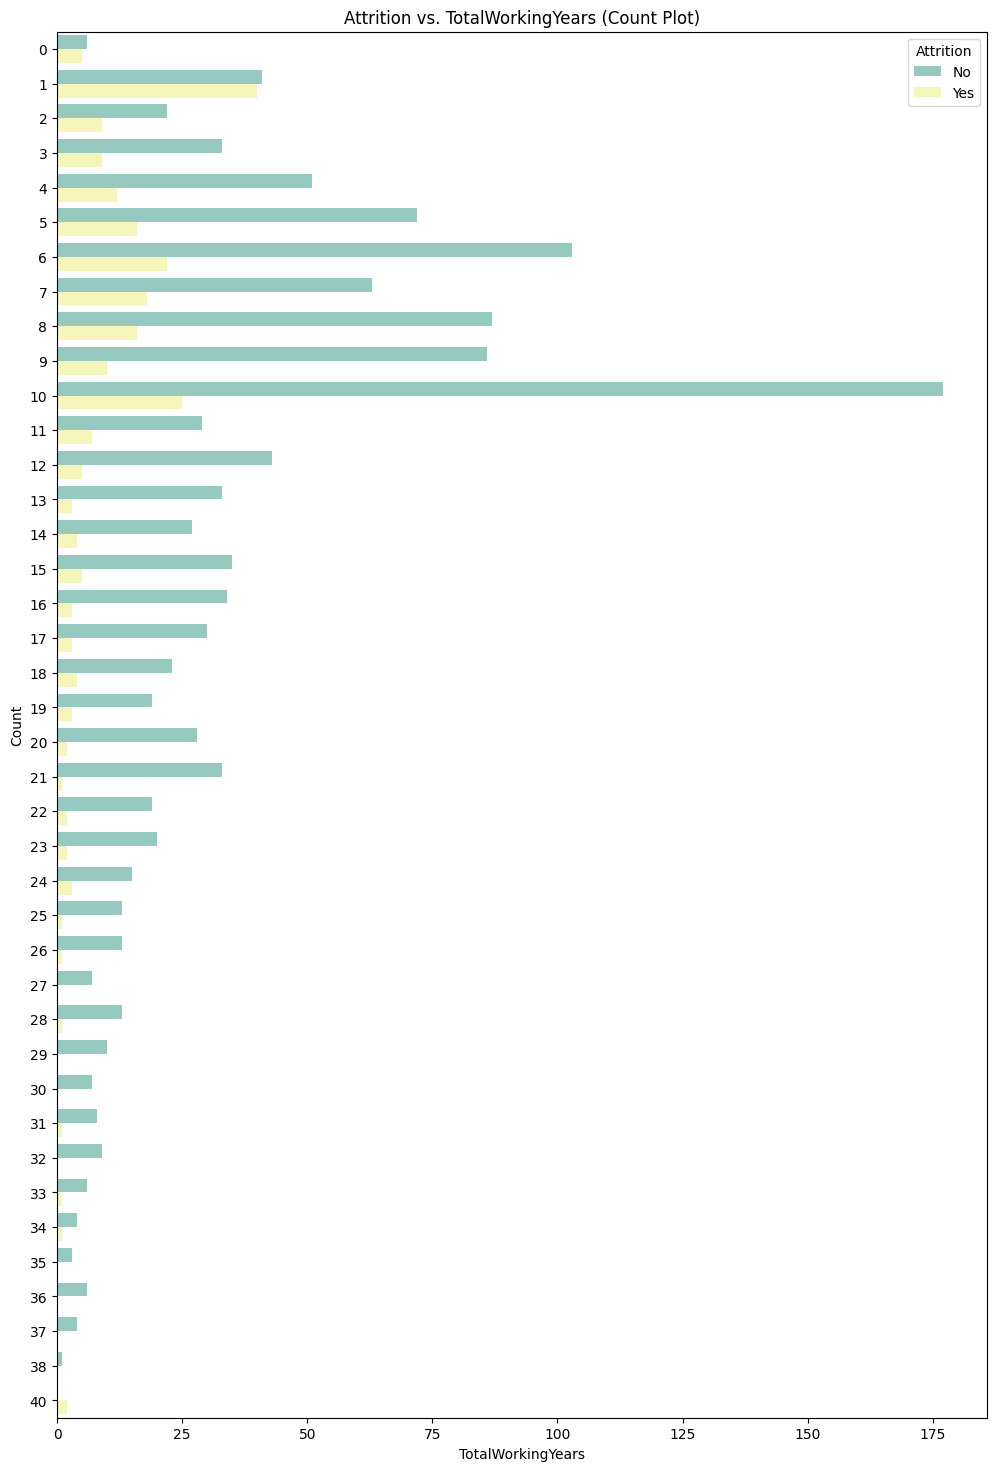

In [132]:
plt.figure(figsize=(12, 18))
sns.countplot(y='TotalWorkingYears', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition vs. TotalWorkingYears (Count Plot)')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Count')
plt.show()

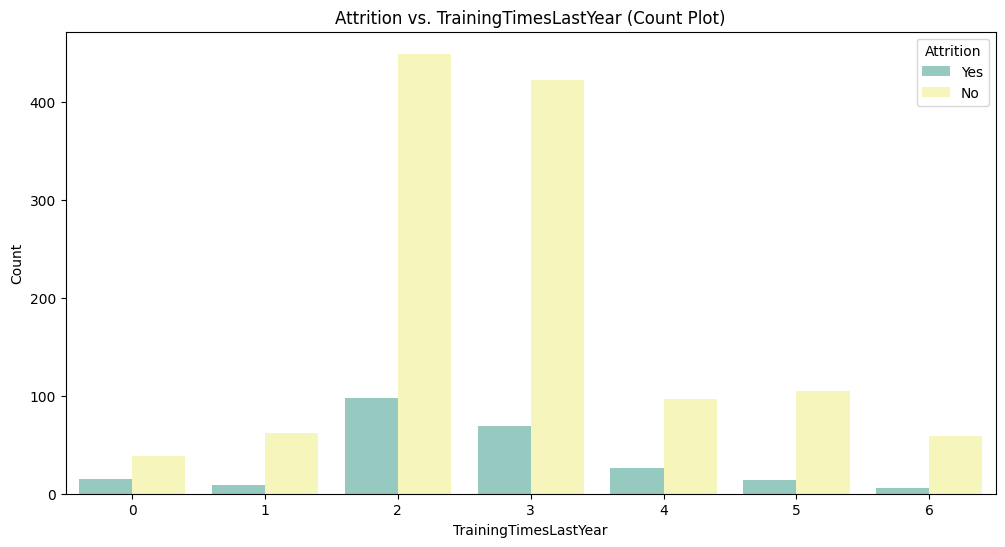

In [133]:
plt.figure(figsize=(12, 6))
sns.countplot(x='TrainingTimesLastYear', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition vs. TrainingTimesLastYear (Count Plot)')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Count')
plt.show()

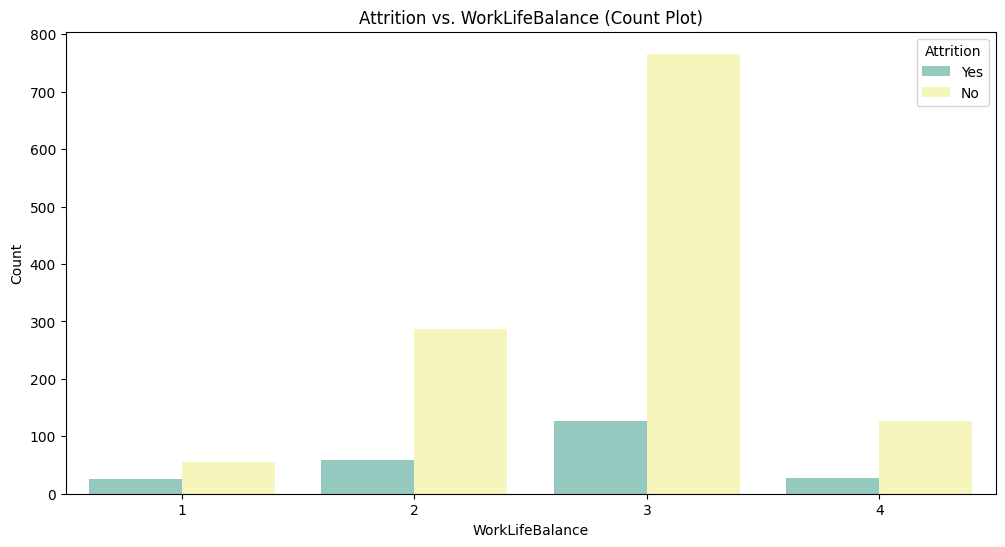

In [134]:
plt.figure(figsize=(12, 6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition vs. WorkLifeBalance (Count Plot)')
plt.xlabel('WorkLifeBalance')
plt.ylabel('Count')
plt.show()

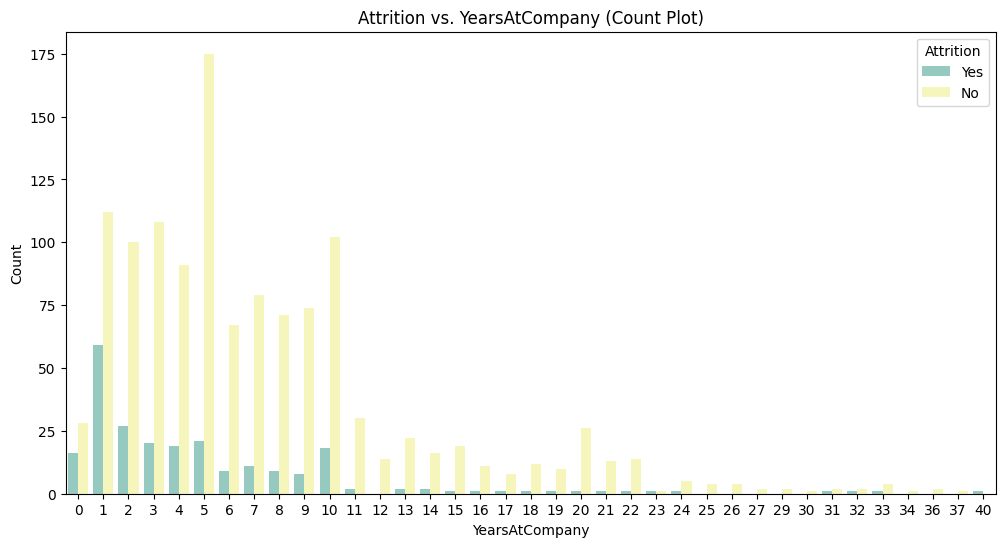

In [135]:
plt.figure(figsize=(12, 6))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition vs. YearsAtCompany (Count Plot)')
plt.xlabel('YearsAtCompany')
plt.ylabel('Count')
plt.show()

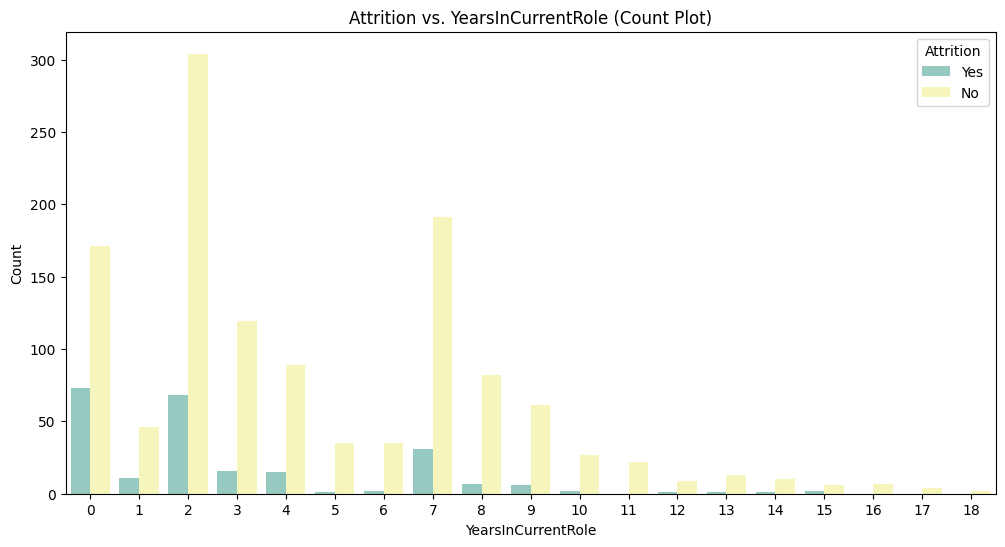

In [136]:
plt.figure(figsize=(12, 6))
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition vs. YearsInCurrentRole (Count Plot)')
plt.xlabel('YearsInCurrentRole')
plt.ylabel('Count')
plt.show()

In [137]:
df['JobSatisfaction'].unique()

array([4, 2, 3, 1])

In [138]:
df['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [139]:
num=df.select_dtypes(include='number')
num

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,jobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,1,2,2,2,4,5993,8,11,3,1,8,0,1,6,4
1,49,8,1,3,2,2,5130,1,23,4,4,10,3,3,10,7
2,37,2,2,4,1,3,2090,6,15,3,2,7,3,3,0,0
3,33,3,4,4,1,3,2909,1,11,3,3,8,3,3,8,7
4,27,2,1,1,1,2,3468,9,12,3,4,6,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,3,2,4,2571,4,17,3,3,17,3,3,5,2
1466,39,6,1,4,3,1,9991,4,15,3,1,9,5,3,7,7
1467,27,4,3,2,2,2,6142,1,20,4,2,6,0,3,6,2
1468,49,2,3,4,2,2,5390,2,14,3,4,17,3,2,9,6


In [140]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'jobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole'],
      dtype='object')


# correlation

In [141]:
correlation=num.corr()
correlation

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,jobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
Age,1.000000,-0.001686,0.208034,0.010146,0.509604,-0.004892,0.497855,0.299635,0.003634,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,0.005303,-0.003669,-0.017014,-0.029251,0.040235,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845
Education,0.208034,0.021042,1.000000,-0.027128,0.101589,-0.011296,0.094961,0.126317,-0.011111,-0.024539,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,0.001212,-0.006784,-0.006259,0.012594,-0.031701,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007
jobLevel,0.509604,0.005303,0.101589,0.001212,1.000000,-0.001944,0.950300,0.142501,-0.034730,-0.021222,0.021642,0.782208,-0.018191,0.037818,0.534739,0.389447
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,-0.001944,1.000000,-0.007157,-0.055699,0.020002,0.002297,-0.012454,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,0.950300,-0.007157,1.000000,0.149515,-0.027269,-0.017120,0.025873,0.772893,-0.021736,0.030683,0.514285,0.363818
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,0.142501,-0.055699,0.149515,1.000000,-0.010238,-0.014095,0.052733,0.237639,-0.066054,-0.008366,-0.118421,-0.090754
PercentSalaryHike,0.003634,0.040235,-0.011111,-0.031701,-0.034730,0.020002,-0.027269,-0.010238,1.000000,0.773550,-0.040490,-0.020608,-0.005221,-0.003280,-0.035991,-0.001520
PerformanceRating,0.001904,0.027110,-0.024539,-0.029548,-0.021222,0.002297,-0.017120,-0.014095,0.773550,1.000000,-0.031351,0.006744,-0.015579,0.002572,0.003435,0.034986


<Axes: >

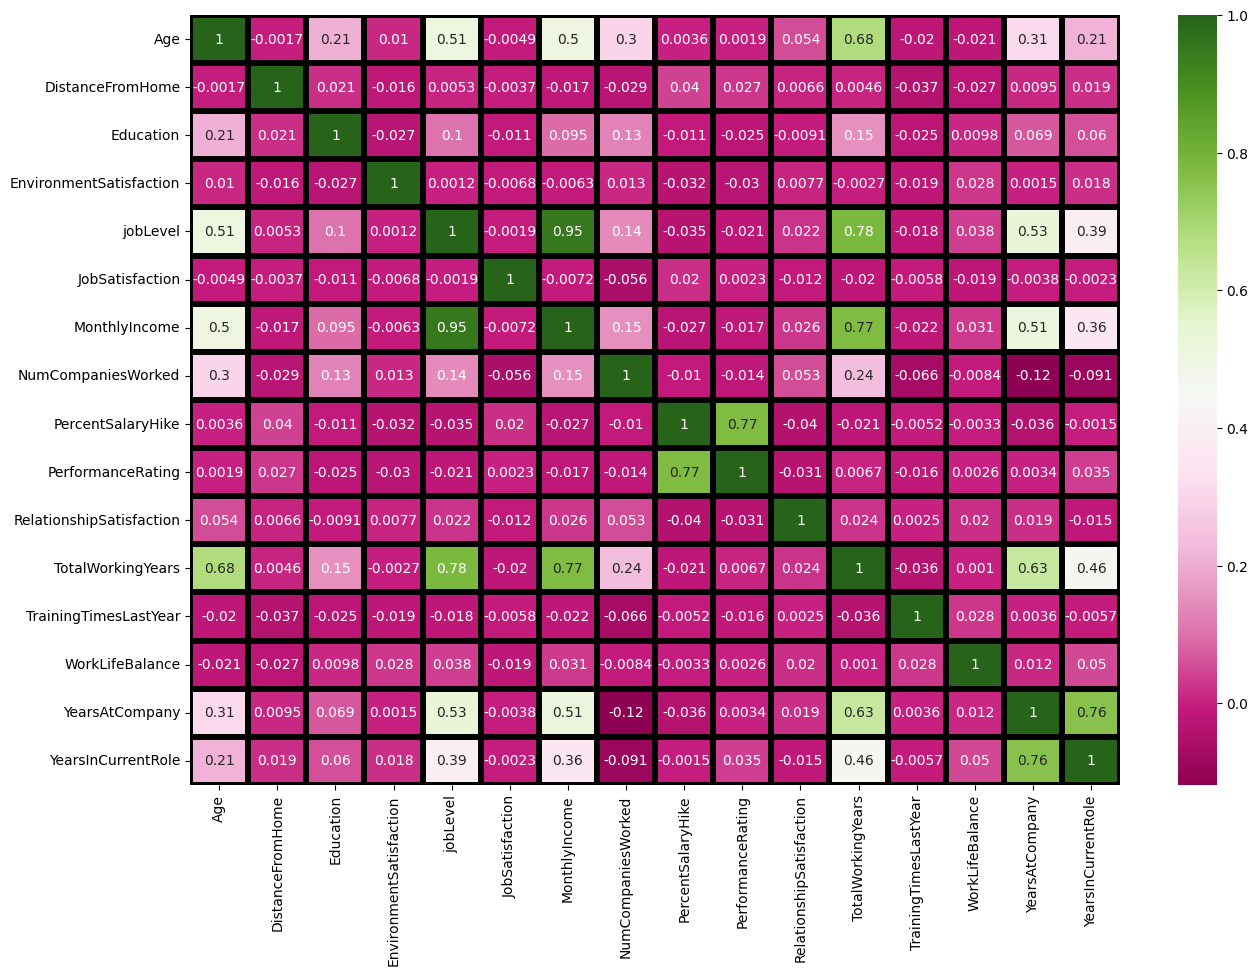

In [142]:
plt.figure(figsize=(15, 10))
sns.heatmap(num.corr(), annot=True, linewidths=4,linecolor="k",cmap='PiYG')

In [143]:
pd.get_dummies(df['Attrition'])

,No,Yes
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
1465,True,False
1466,True,False
1467,True,False
1468,True,False


In [144]:
df=pd.read_csv("C:\\Users\\wanja\\OneDrive\\Desktop\\Jupyter\\Employee ATT.csv")
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,jobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,2,...,Yes,11,3,1,0,8,0,1,6,4
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,1,10,3,3,10,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,1,...,Yes,15,3,2,0,7,3,3,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,1,...,Yes,11,3,3,0,8,3,3,8,7
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,1,...,No,12,3,4,1,6,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,2,...,No,17,3,3,1,17,3,3,5,2
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,3,...,No,15,3,1,1,9,5,3,7,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,2,...,Yes,20,4,2,1,6,0,3,6,2
1468,49,No,Travel_Frequently,Sales,2,3,Medical,4,Male,2,...,No,14,3,4,0,17,3,2,9,6


In [145]:
df.columns 

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'jobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole'],
      dtype='object')

# Labal Encoding

In [146]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'jobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole'],
      dtype='object')

In [147]:
df.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,jobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,2,...,Yes,11,3,1,0,8,0,1,6,4
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,1,10,3,3,10,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,1,...,Yes,15,3,2,0,7,3,3,0,0


In [148]:
le = preprocessing.LabelEncoder()
categorial_variables = ['Attrition','BusinessTravel','Department','EducationField',
                        'Gender','JobRole','MaritalStatus','OverTime','EnvironmentSatisfaction','Gender']

In [149]:
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df['EnvironmentSatisfaction'] = le.fit_transform(df['EnvironmentSatisfaction'])
df['jobLevel'] = le.fit_transform(df['jobLevel'])
df['Gender'] = le.fit_transform(df['Gender'])

In [150]:
df.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,jobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,1,2,2,1,2,1,1,0,1,...,1,11,3,1,0,8,0,1,6,4
1,49,0,1,1,8,1,1,2,1,1,...,0,23,4,4,1,10,3,3,10,7
2,37,1,2,1,2,2,4,3,1,0,...,1,15,3,2,0,7,3,3,0,0
3,33,0,1,1,3,4,1,3,0,0,...,1,11,3,3,0,8,3,3,8,7
4,27,0,2,1,2,1,3,0,1,0,...,0,12,3,4,1,6,3,3,2,2


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int64
 9   jobLevel                  1470 non-null   int64
 10  JobRole                   1470 non-null   int64
 11  JobSatisfaction           1470 non-null   int64
 12  MaritalStatus             1470 non-null   int64
 13  MonthlyIncome             1470 non-null   int64
 14  NumCompaniesWorked        1470 non-null 

# Spliting data into Train And test

In [152]:
target = df['Attrition'] #x
train = df.drop('Attrition',axis = 1) #y
train.shape

(1470, 24)

In [153]:
target.head(1)

0    1
Name: Attrition, dtype: int64

In [154]:
train.head(1)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,jobLevel,JobRole,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,2,2,1,2,1,1,0,1,7,...,1,11,3,1,0,8,0,1,6,4


In [155]:
train_accuracy = []
test_accuracy = []
models = ['Logistic Regression']

In [156]:
def train_test_error(y_train,y_test):
    train_error = ((y_train==Y_train).sum())/len(y_train)*100
    test_error = ((y_test==Y_test).sum())/len(Y_test)*100
    train_accuracy.append(train_error)
    test_accuracy.append(test_error)
    print('{}'.format(train_error) + " is the train accuracy")
    print('{}'.format(test_error) + " is the test accuracy")

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.25, random_state=42)

# Logistic Regression

In [158]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
train_predict = log_reg.predict(X_train)
test_predict = log_reg.predict(X_test)
y_prob = log_reg.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

83.66606170598911 is the train accuracy
86.41304347826086 is the test accuracy


# Decision Tree

In [159]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
mod2=DecisionTreeClassifier()

In [161]:
mod2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [162]:
mod2 = DecisionTreeClassifier()
mod2.fit(X_train,Y_train)
train_predict = mod2.predict(X_train)
test_predict = mod2.predict(X_test)
y_prob = mod2.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

100.0 is the train accuracy
80.70652173913044 is the test accuracy


# Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
mod=RandomForestClassifier()

In [165]:
mod.fit(X_train,Y_train)

RandomForestClassifier()

In [166]:
mod = RandomForestClassifier()
mod.fit(X_train,Y_train)
train_predict = mod.predict(X_train)
test_predict = mod.predict(X_test)
y_prob = mod.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

100.0 is the train accuracy
86.95652173913044 is the test accuracy


In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
lee=LogisticRegression()

In [169]:
lee.fit(X_train,Y_train)

LogisticRegression()

In [170]:
lee = LogisticRegression()
lee.fit(X_train,Y_train)
train_predict = lee.predict(X_train)
test_predict = lee.predict(X_test)
y_prob = lee.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

83.66606170598911 is the train accuracy
86.41304347826086 is the test accuracy


# Support Vector Machine

In [171]:
from sklearn.svm import SVC

In [172]:
s= SVC()

In [173]:
s.fit(X_train,Y_train)

SVC()

In [174]:
s = SVC()
s.fit(X_train,Y_train)
train_predict = s.predict(X_train)
test_predict = s.predict(X_test)
y_prob = s.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

82.84936479128856 is the train accuracy
86.95652173913044 is the test accuracy


# k-Nearest Neighbors (k-NN)

In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [176]:
knn = KNeighborsClassifier()

In [177]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [178]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)
y_prob = knn.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

84.11978221415607 is the train accuracy
84.23913043478261 is the test accuracy


# Naive Bayes

In [179]:
from sklearn.naive_bayes import GaussianNB

In [180]:
nb= GaussianNB()

In [181]:
nb.fit(X_train,Y_train)

GaussianNB()

In [182]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
train_predict = nb.predict(X_train)
test_predict = nb.predict(X_test)
y_prob = nb.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

81.39745916515426 is the train accuracy
83.69565217391305 is the test accuracy


# XGBoost

In [183]:
from xgboost import XGBClassifier

In [184]:
xgb = XGBClassifier()

In [185]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [186]:
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
train_predict = xgb.predict(X_train)
test_predict = xgb.predict(X_test)
y_prob = xgb.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

100.0 is the train accuracy
87.77173913043478 is the test accuracy


In [187]:
y_pred = xgb.predict(X_test)

# AdaBoost

In [188]:
from sklearn.ensemble import AdaBoostClassifier


In [189]:
ab=AdaBoostClassifier()

In [190]:
ab.fit(X_train,Y_train)

AdaBoostClassifier()

In [191]:
ab = AdaBoostClassifier()
ab.fit(X_train,Y_train)
train_predict = ab.predict(X_train)
test_predict = ab.predict(X_test)
y_prob = ab.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

90.65335753176043 is the train accuracy
86.1413043478261 is the test accuracy


# k-Means Clustering

In [192]:
from sklearn.cluster import KMeans


In [193]:
km=KMeans()

In [194]:
km.fit(X_train,Y_train)

KMeans()

In [195]:
Km = SVC()
s.fit(X_train,Y_train)
train_predict = s.predict(X_train)
test_predict = s.predict(X_test)
y_prob = s.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

82.84936479128856 is the train accuracy
86.95652173913044 is the test accuracy


In [196]:
# Hierarchical Clustering